<a href="https://colab.research.google.com/github/annisapraditha/tugaspraktikum_ML3/blob/main/Kegiatan%201%20(007).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Define kaggle json path
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/RESEARCH CENTER/DATASETS"

In [3]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/RESEARCH CENTER/DATASETS/

/content/drive/My Drive/RESEARCH CENTER/DATASETS


In [4]:
# Cek apakah api sudah terbaca oleh sistem
from google.colab import files
!ls  
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdulbariqaldhia","key":"2c20cc2f91466ff85fa66e3cfd8b99ee"}'}

In [5]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 97% 298M/306M [00:04<00:00, 89.1MB/s]
100% 306M/306M [00:04<00:00, 76.8MB/s]


In [6]:
# Cek isi direktori kerja dan memastikan dataset telah berhasil didownload.
!ls

kaggle.json  rockpaperscissors.zip


In [7]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
!unzip \*.zip &> /dev/null && rm *.zip

In [8]:
# Cek isi direktori kerja untuk memastikan dataset telah berhasil diekstrak.
!ls

kaggle.json  paper  README_rpc-cv-images.txt  rock  rps-cv-images  scissors


In [9]:
# TULIS CODE ANDA DISINI
%cd /content/drive/My Drive/RESEARCH CENTER
!ls

/content/drive/My Drive/RESEARCH CENTER
DATASETS


In [10]:
# TULIS CODE ANDA DISINI
os.mkdir("DATASETS/train")
os.mkdir("DATASETS/train/rock")
os.mkdir("DATASETS/train/paper")
os.mkdir("DATASETS/train/scissors")
os.mkdir("DATASETS/test")
os.mkdir("DATASETS/test/rock")
os.mkdir("DATASETS/test/paper")
os.mkdir("DATASETS/test/scissors")
os.mkdir("DATASETS/validation")
os.mkdir("DATASETS/validation/rock")
os.mkdir("DATASETS/validation/paper")
os.mkdir("DATASETS/validation/scissors")

In [11]:
# TULIS CODE ANDA DISINI
import shutil, os, glob

base_dataset = "DATASETS"
class_dir = ['rock','paper','scissors']
for class_item in class_dir:
    X = []
    Y = []
    locate = class_item
    cur_dir = base_dataset+"/"+class_item
    dataset = os.listdir(cur_dir)
    train_len_func = int(80/100*len(dataset))
    
    srcDir = base_dataset + "/" + locate
    dstDir_train = 'DATASETS/train/' + locate.lower()
    dstDir_val = 'DATASETS/validation/' + locate.lower()
    for item in dataset:
        if len(X) < train_len_func:
            X.append(item)
            shutil.move(srcDir + '/' + item, dstDir_train + '/' + item);
        else:
            Y.append(item)
            shutil.move(srcDir + '/' + item, dstDir_val + '/' + item);
    



In [12]:
# TULIS CODE ANDA DISINI
import shutil, os, glob

base_dataset = "DATASETS/train"
class_dir = ['rock','paper','scissors']
for class_item in class_dir:
    X = []
    Y = []
    locate = class_item
    cur_dir = base_dataset+"/"+class_item
    dataset = os.listdir(cur_dir)
    train_len_func = int(80/100*len(dataset))
    
    srcDir = base_dataset + "/" + locate
    dstDir_train = 'DATASETS/train/' + locate.lower()
    dstDir_val = 'DATASETS/test/' + locate.lower()
    for item in dataset:
        if len(X) < train_len_func:
            X.append(item)
            shutil.move(srcDir + '/' + item, dstDir_train + '/' + item);
        else:
            Y.append(item)
            shutil.move(srcDir + '/' + item, dstDir_val + '/' + item);
    



In [13]:
%cd /content/drive/My Drive/RESEARCH CENTER/DATASETS

/content/drive/My Drive/RESEARCH CENTER/DATASETS


In [14]:
!ls

kaggle.json  README_rpc-cv-images.txt  rps-cv-images  test   validation
paper	     rock		       scissors       train


In [15]:
import os

train_dir = 'train'
validation_dir = 'validation'
test_dir = 'test'

train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

test_rock_dir = os.path.join(test_dir, 'rock')
test_paper_dir = os.path.join(test_dir, 'paper')
test_scissors_dir = os.path.join(test_dir, 'scissors')

#penamaan variabel data rok paper dll 

In [16]:
print('total training rock images:', len(os.listdir(train_rock_dir)))
print('total training paper images:', len(os.listdir(train_paper_dir)))
print('total training scissors images:', len(os.listdir(train_scissors_dir)))

print('\ntotal validation rock images:', len(os.listdir(validation_rock_dir)))
print('total validation paper images:', len(os.listdir(validation_paper_dir)))
print('total validation scissors images:', len(os.listdir(validation_scissors_dir)))

print('\ntotal test rock images:', len(os.listdir(test_rock_dir)))
print('total test paper images:', len(os.listdir(test_paper_dir)))
print('total test scissors images:', len(os.listdir(test_scissors_dir)))

total training rock images: 464
total training paper images: 455
total training scissors images: 480

total validation rock images: 146
total validation paper images: 143
total validation scissors images: 150

total test rock images: 116
total test paper images: 114
total test scissors images: 120


In [17]:
# Definisikan path untuk data train test dan validation
# sesuaikan dengan path anda
train_path = "train"
test_path  = "test"
val_path   = "validation"

In [18]:
# TULIS KODE ANDA DISINI
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
training_set = train_datagen.flow_from_directory(  train_path,
                                       target_size=(128, 128),
                                             color_mode="rgb",
                                                batch_size=32,
                                     class_mode='categorical',
                                               shuffle = True)

Found 1399 images belonging to 3 classes.


In [20]:
validation_set = val_datagen.flow_from_directory(    val_path,
                                       target_size=(128, 128),
                                             color_mode="rgb",
                                                batch_size=32,
                                     class_mode='categorical',
                                               shuffle = False)

Found 439 images belonging to 3 classes.


In [21]:
test_set = val_datagen.flow_from_directory(         test_path,
                                       target_size=(128, 128),
                                             color_mode="rgb",
                                                batch_size=32,
                                     class_mode='categorical',
                                               shuffle = False)

Found 350 images belonging to 3 classes.


In [22]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Activation, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# DEFINISIKAN MODEL ANDA DISINI
model = Sequential()

model.add(InputLayer(input_shape=[128,128,3]))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=3, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# TULIS CODE UNTUK MENAMPILKAN SUMMARY DARI ARSITEKTUR MODEL ANDA DISINI
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0

In [24]:
# TULIS CODE UNTUK DEFINISI LEARNING RATE DISINI 
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.01), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
# TULIS CODE UNTUK TRAINING DISINI
import time

start = time.time()
H = model.fit_generator(
        training_set,
        steps_per_epoch=44,
        epochs=100,
        validation_data=validation_set,
        validation_steps=5)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
44/44 [==============================] - 45s 988ms/step - loss: 0.7326 - acc: 0.6462 - val_loss: 66.4218 - val_acc: 0.0000e+00
Epoch 2/100
44/44 [==============================] - 43s 983ms/step - loss: 0.5796 - acc: 0.7520 - val_loss: 23.6663 - val_acc: 0.0000e+00
Epoch 3/100
44/44 [==============================] - 43s 975ms/step - loss: 0.5483 - acc: 0.7598 - val_loss: 2.0689 - val_acc: 0.0375
Epoch 4/100
44/44 [==============================] - 43s 964ms/step - loss: 0.4945 - acc: 0.7570 - val_loss: 0.6726 - val_acc: 0.7188
Epoch 5/100
44/44 [==============================] - 42s 954ms/step - loss: 0.4853 - acc: 0.7598 - val_loss: 0.5597 - val_acc: 0.7875
Epoch 6/100
44/44 [==============================] - 43s 982ms/step - loss: 0.3883 - acc: 0.8277 - val_loss: 0.2950 - val_acc: 0.9312
Epoch 7/100
44/44 [==============================] - 41s 937ms/step - loss: 0.3822 - acc: 0.8385 - val_loss: 3.2147 - val_acc: 0.1187
Epoch 8/100
44/44 [==============================] -

In [26]:
from keras.models import save_model
model = save_model(model,'modul3.h5')

In [27]:
!ls

kaggle.json  paper		       rock	      scissors	train
modul3.h5    README_rpc-cv-images.txt  rps-cv-images  test	validation


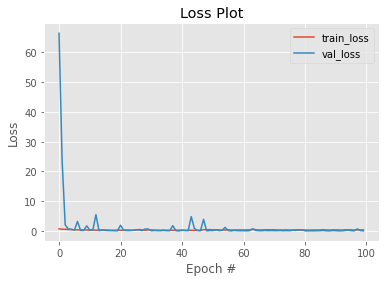

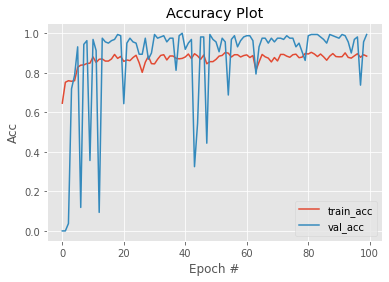

In [28]:
# TULIS CODE UNTUK PLOT EVALUASI MODEL DISINI
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

test/rock/dZ6rscIYTbmlwVZE.png
Predicted: rock
 
test/rock/dnss2tOuxRmL0ZjZ.png
Predicted: rock
 
test/rock/dwcRLIlsRlaRevNn.png
Predicted: rock
 
test/rock/dxfucopsE3UFuH28.png
Predicted: rock
 
test/rock/e6cXS0w2KOKKEYZU.png
Predicted: rock
 
test/rock/eGm3dLnWBxRrjlJX.png
Predicted: rock
 
test/rock/eHSa1nP8bmRToqyG.png
Predicted: rock
 
test/rock/eJ5fbY23rZWUULxO.png
Predicted: rock
 
test/rock/eTo9zgxdhJJAvrfM.png
Predicted: rock
 
test/rock/eb93o1ZDeBlrdfyc.png
Predicted: rock
 
test/rock/esqqaIq6wKOr8EK6.png
Predicted: rock
 
test/rock/evxvBwQgL8Kvv67C.png
Predicted: rock
 
test/rock/f1yI657Ka9iHuVGB.png
Predicted: rock
 
test/rock/f2pYnAURozqBDJDy.png
Predicted: rock
 
test/rock/f48wzqwquNrvjICP.png
Predicted: rock
 
test/rock/fGaDsQT8mUTaytaT.png
Predicted: rock
 
test/rock/fK7m8vZQS1RUHcMr.png
Predicted: scissors
 
test/rock/fLFzQoErbCBRR6NM.png
Predicted: rock
 
test/rock/fMQzh7RRM5fbtBiC.png
Predicted: rock
 
test/rock/fQPCA8oYZ8ywDgyv.png
Predicted: rock
 
test/rock/fa3PZH

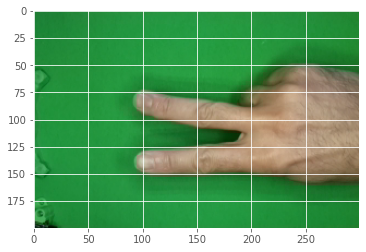

In [29]:
# TULIS CODE UNTUK PREDIKSI DATA TEST DISINI
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

model_path = 'modul3.h5'
model_weights_path = 'weight.h5'
test_path = 'test'

model = load_model(model_path)

def predict(file):
  x = load_img(file, target_size=(128,128))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  #print(result)
  answer = np.argmax(result)
  if answer == 1:
    print("Predicted: rock")
  elif answer == 0:
    print("Predicted: paper")
  elif answer == 2:
    print("Predicted: scissors")

  return answer

#Walk the directory for every image
for i, ret in enumerate(os.walk(test_path)):
  for i, filename in enumerate(ret[2]):
    if filename.startswith("."):
      continue
    
    print(ret[0] + '/' + filename)
    img = mpimg.imread(ret[0] + '/' + filename)
    plt.imshow(img)
    result = predict(ret[0] + '/' + filename)
    print(" ")

test/rock/dZ6rscIYTbmlwVZE.png
Predicted: rock
 
test/rock/dnss2tOuxRmL0ZjZ.png
Predicted: rock
 
test/rock/dwcRLIlsRlaRevNn.png
Predicted: rock
 
test/rock/dxfucopsE3UFuH28.png
Predicted: rock
 
test/rock/e6cXS0w2KOKKEYZU.png
Predicted: rock
 
test/rock/eGm3dLnWBxRrjlJX.png
Predicted: rock
 
test/rock/eHSa1nP8bmRToqyG.png
Predicted: rock
 
test/rock/eJ5fbY23rZWUULxO.png
Predicted: rock
 
test/rock/eTo9zgxdhJJAvrfM.png
Predicted: rock
 
test/rock/eb93o1ZDeBlrdfyc.png
Predicted: rock
 
test/rock/esqqaIq6wKOr8EK6.png
Predicted: rock
 
test/rock/evxvBwQgL8Kvv67C.png
Predicted: rock
 
test/rock/f1yI657Ka9iHuVGB.png
Predicted: rock
 
test/rock/f2pYnAURozqBDJDy.png
Predicted: rock
 
test/rock/f48wzqwquNrvjICP.png
Predicted: rock
 
test/rock/fGaDsQT8mUTaytaT.png
Predicted: rock
 
test/rock/fK7m8vZQS1RUHcMr.png
Predicted: scissors
 
test/rock/fLFzQoErbCBRR6NM.png
Predicted: rock
 
test/rock/fMQzh7RRM5fbtBiC.png
Predicted: rock
 
test/rock/fQPCA8oYZ8ywDgyv.png
Predicted: rock
 
test/rock/fa3PZH

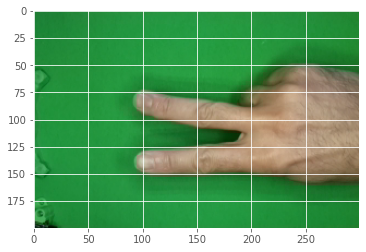

In [30]:
# TULIS CODE UNTUK PREDIKSI DATA TEST DISINI
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

model_path = 'modul3.h5'
model_weights_path = 'weight.h5'
test_path = 'test'

model = load_model(model_path)

def predict(file):
  x = load_img(file, target_size=(128,128))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  #print(result)
  answer = np.argmax(result)
  if answer == 1:
    print("Predicted: rock")
  elif answer == 0:
    print("Predicted: paper")
  elif answer == 2:
    print("Predicted: scissors")

  return answer

#Walk the directory for every image
for i, ret in enumerate(os.walk(test_path)):
  for i, filename in enumerate(ret[2]):
    if filename.startswith("."):
      continue
    
    print(ret[0] + '/' + filename)
    img = mpimg.imread(ret[0] + '/' + filename)
    plt.imshow(img)
    result = predict(ret[0] + '/' + filename)
    print(" ")